In [37]:
from pathlib import Path
session_path = Path(r'C:\Users\Mayo\Downloads\FlatIron\FD_01\2022-08-04\001')

# Check video metadata (two ways to be sure)

In [3]:
from ibllib.io.video import get_video_meta, get_video_frame

left_video_path = session_path.joinpath('raw_video_data',  'left_cam_run000_00000000.avi')
right_video_path = session_path.joinpath('raw_video_data',  'right_cam_run000_00000000.avi')
body_video_path = session_path.joinpath('raw_video_data',  'body_cam_run000_00000000.avi')

left_meta = get_video_meta(left_video_path)
print('Left Video')
print(left_meta)
print('\n')

right_meta = get_video_meta(right_video_path)
print('Right Video')
print(right_meta)
print('\n')

body_meta = get_video_meta(body_video_path)
print('Body Video')
print(body_meta)
print('\n')



Left Video
{'length': 244162, 'fps': 60, 'width': 1280, 'height': 1024, 'duration': datetime.timedelta(seconds=4069, microseconds=366667), 'size': 3797866936}


Right Video
{'length': 612757, 'fps': 150, 'width': 640, 'height': 512, 'duration': datetime.timedelta(seconds=4085, microseconds=46667), 'size': 2299894288}


Body Video
{'length': 122433, 'fps': 30, 'width': 640, 'height': 512, 'duration': datetime.timedelta(seconds=4081, microseconds=100000), 'size': 1302330524}




In [8]:
from wfield import VideoStack

left_video = VideoStack([str(left_video_path)])
print('Left Video')
print(left_video.shape)
print(left_video.framerate)
print(left_video.nframes)
print('\n')

right_video = VideoStack([str(right_video_path)])
print('Right Video')
print(right_video.shape)
print(right_video.framerate)
print(right_video.nframes)
print('\n')

body_video = VideoStack([str(body_video_path)])
print('Body Video')
print(body_video.shape)
print(body_video.framerate)
print(body_video.nframes)
print('\n')

Left Video
(244162, 1, 1024, 1280)
60.0
244162


Right Video
(612757, 1, 512, 640)
150.0
612757


Body Video
(122433, 1, 512, 640)
30.0
122433




# Conversion to mp4
Using this command `ffmpeg -i input_filename.avi -c:v copy -c:a copy -y output_filename.mp4` from https://ottverse.com/ffmpeg-convert-avi-to-mp4-lossless/

In [11]:
left_meta = get_video_meta(left_video_path.with_suffix('.mp4'))
print('Left Video')
print(left_meta)
print('\n')

right_meta = get_video_meta(right_video_path.with_suffix('.mp4'))
print('Right Video')
print(right_meta)
print('\n')

body_meta = get_video_meta(body_video_path.with_suffix('.mp4'))
print('Body Video')
print(body_meta)
print('\n')

Left Video
{'length': 244162, 'fps': 60, 'width': 1280, 'height': 1024, 'duration': datetime.timedelta(seconds=4069, microseconds=366667), 'size': 3795711840}


Right Video
{'length': 612757, 'fps': 150, 'width': 640, 'height': 512, 'duration': datetime.timedelta(seconds=4085, microseconds=46667), 'size': 2292605179}


Body Video
{'length': 122433, 'fps': 30, 'width': 640, 'height': 512, 'duration': datetime.timedelta(seconds=4081, microseconds=100000), 'size': 1300178354}




# Check conversion is legit

In [19]:
import numpy as np
from random import sample

frame_idx = sample(range(left_meta['length']), 20)
frame_idx = [0] + frame_idx + [left_meta['length']] # make sure to check last and first just in case
for fr in frame_idx:
    frame_avi = get_video_frame(left_video_path, fr)
    frame_mp4 = get_video_frame(left_video_path.with_suffix('.mp4'), fr)
    assert np.array_equal(frame_avi, frame_mp4)

# Check dlc

244163

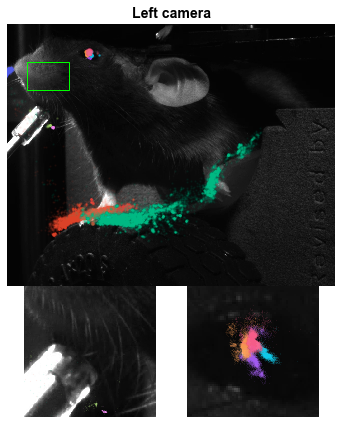

In [46]:
import pandas as pd
from brainbox.behavior.dlc import plot_trace_on_frame

left_dlc = pd.read_parquet(session_path.joinpath('alf', '_ibl_leftCamera.dlc.pqt'))
plot_trace_on_frame(get_video_frame(left_video_path.with_suffix('.mp4'), 100), left_dlc, 'left')
len(left_dlc['nose_tip_x'].values)

612758

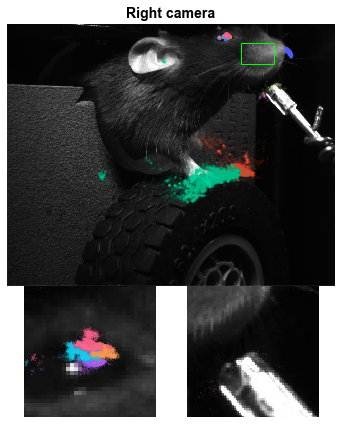

In [47]:
right_dlc = pd.read_parquet(session_path.joinpath('alf', '_ibl_rightCamera.dlc.pqt'))
plot_trace_on_frame(get_video_frame(right_video_path.with_suffix('.mp4'), 100), right_dlc, 'right')
len(right_dlc['nose_tip_x'].values)

122434

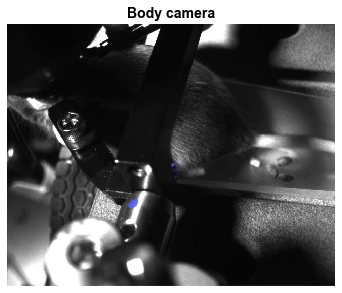

In [51]:
body_dlc = pd.read_parquet(session_path.joinpath('alf', '_ibl_bodyCamera.dlc.pqt'))
plot_trace_on_frame(get_video_frame(body_video_path.with_suffix('.mp4'), 100), body_dlc, 'body')
len(body_dlc['tail_start_x'].values)

# Compare with dlc from BWM IBL session

<AxesSubplot:title={'center':'Left camera'}>

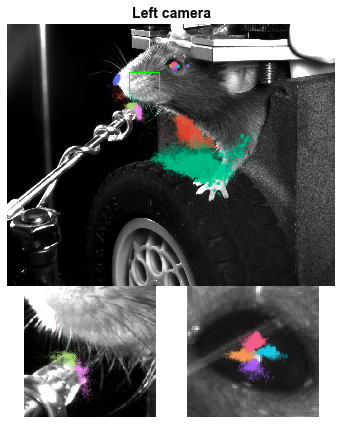

In [31]:
from ibllib.io.video import url_from_eid
from one.api import ONE

one = ONE()
eid = '56b57c38-2699-4091-90a8-aba35103155e'

left_video_url = url_from_eid(eid, 'left', one)
left_dlc = one.load_dataset(eid, '_ibl_leftCamera.dlc.pqt')
plot_trace_on_frame(get_video_frame(left_video_url, 100), left_dlc, 'left')

<AxesSubplot:title={'center':'Right camera'}>

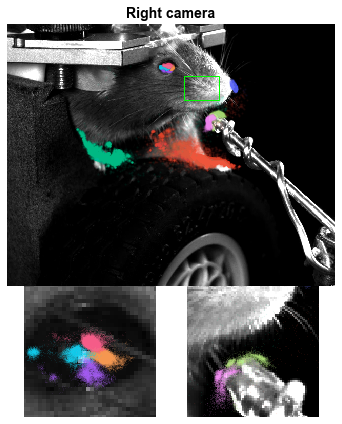

In [36]:
right_video_url = url_from_eid(eid, 'right', one)
right_dlc = one.load_dataset(eid, '_ibl_rightCamera.dlc.pqt')
plot_trace_on_frame(get_video_frame(right_video_url, 100), right_dlc, 'right')

<AxesSubplot:title={'center':'Body camera'}>

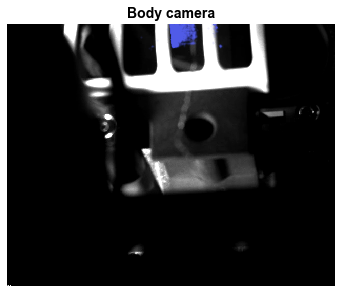

In [35]:
body_video_url = url_from_eid(eid, 'body', one)
body_dlc = one.load_dataset(eid, '_ibl_bodyCamera.dlc.pqt')
plot_trace_on_frame(get_video_frame(body_video_url, 100), body_dlc, 'body')

# DLC QC